In [8]:
from __future__ import print_function, division
import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from scipy import special
from sklearn.linear_model import LinearRegression

# 6 Challenge 1

In [9]:
n_samples = 100
def f(x):
    return np.log(x)
x_plot = np.linspace(0, 1, 100)
X5 = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y5 = f(X5) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


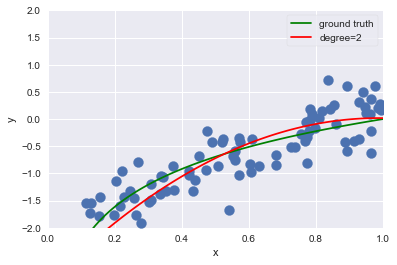

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def plot_approximation(est, ax, label=None):
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X5, y5, s=100)   
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)
    
fig,ax = plt.subplots(1,1)

degree = 2

est = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=True))

est.fit(X5, y5)

plot_approximation(est, ax, label='degree=%d' % degree)

# 6 Challenge 2

In [11]:
n_samples = 100
def f2(x):
    return x + x^2 + np.random.randn()
X6 = np.random.uniform(0, 10, size=n_samples)[:, np.newaxis]
y6 = f(X6) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.3)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)

In [13]:
metrics.mean_squared_error(X_train, y_train),metrics.mean_squared_error(X_test, y_test)

(18.449873592808625, 15.436107521705233)

# 6 Challenge 3

In [14]:
train_list = []
test_list = []
R_squared_list = []
AIC = []

for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    poly = est.predict(X_test)
    poly2 = est.predict(X_train)
    R_squared_list.append(est.score(X_test, y_test))
    test_list.append(metrics.mean_squared_error(poly, y_test))
    train_list.append(metrics.mean_squared_error(poly2, y_train))
    resid = y_test - poly
    sse = sum(resid**2)
    AIC.append(2*degree - 2*np.log(sse))

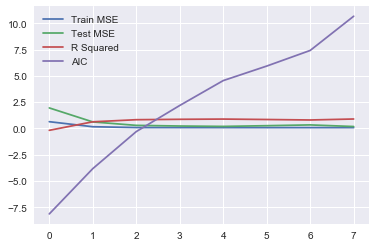

In [15]:
plt.plot(range(8),train_list, label = 'Train MSE');
plt.plot(range(8),test_list, label = 'Test MSE' );
plt.plot(range(8),R_squared_list, label = 'R Squared');
plt.plot(range(8),AIC, label = 'AIC');
plt.legend();

# 6 Challenge 4

In [16]:
train_list2 = []
test_list2 = []

for a in range(5,101,5):
    X_train, X_test, y_train, y_test = train_test_split(X6[:a], y6[:a], test_size=0.3)
    lr3 = LinearRegression()
    lr3.fit(X_train, y_train)
    train_list2.append(metrics.mean_squared_error(X_train, y_train))
    test_list2.append(metrics.mean_squared_error(X_test, y_test)) 

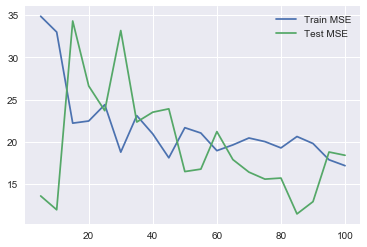

In [17]:
plt.plot(range(5,101,5),train_list2, label = 'Train MSE');
plt.plot(range(5,101,5),test_list2, label = 'Test MSE' );
plt.legend();